# Analyze a Dataset

5 Feb 2016 | ** Claire Gatenby **

Boston Housing Data. Concerns housing values in suburbs of Boston.

source: https://archive.ics.uci.edu/ml/datasets/Housing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("housing.csv",
           unpack=True)


## Accessing the Data.

I wanted to access the data using Numpy. `data` is the Boston housing data stored in numpy array, each index represents a data column with the attributes below. 

## Boston Housing Data attributes by index

0: CRIM - per capita crime rate by town

1: ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

2: INDUS - proportion of non-retail business acres per town

3: CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

4: NOX - nitric oxides concentration (parts per 10 million)

5: RM - average number of rooms per dwelling

6: AGE - proportion of owner-occupied units built prior to 1940

7: DIS - weighted distances to five Boston employment centres

8: RAD - index of accessibility to radial highways

9: TAX - full-value property-tax rate per US 10,000

10: PTRATIO - pupil-teacher ratio by town

11: B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

12: LSTAT - % lower status of the population

13: MEDV - Median value of owner-occupied homes in US 1000's


**Stats:** The average home values across all Boston Suburbs in dollars

In [3]:
data[-1].mean() * 1000

22532.806324110676

**Stats:** The median home values across all Boston Suburbs in dollars

In [4]:
np.median(data[-1]) * 1000

21200.0

**Stats:** The median home value of the suburb with the newest houses.

In [5]:
data[-1][np.argmin(data[6])]*1000


26600.0

**Plotting Data:** The relationship between per-capita crime rate and the pupil-teacher ratio. Differentiate between whether or not the suburb is bounded by the Charles River.

The plot below shows that suburbs with a higher crime rate have a larger student to teacher ratio (over 20 students per teacher). There is no significant difference between suburbs on the Charles river vs not.

In [6]:
charles_crime_idx = np.where( data[3] == 1 )
charles_crime = np.array([data[0][row] for row in charles_crime_idx])
charles_pt = np.array([data[10][row] for row in charles_crime_idx])

In [7]:
nocharles_crime_idx = np.where(data[3] == 0)
nocharles_crime = np.array([data[0][row] for row in nocharles_crime_idx])
nocharles_pt = np.array([data[10][row] for row in nocharles_crime_idx])

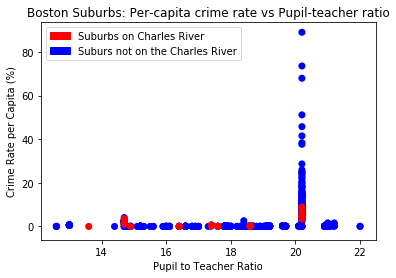

In [8]:
import matplotlib.patches as mpatches
plt.scatter(nocharles_pt, nocharles_crime, s=50, c="blue", edgecolor="None")
plt.scatter(charles_pt, charles_crime,  s=50, c="red", edgecolor="None")
plt.title('Boston Suburbs: Per-capita crime rate vs Pupil-teacher ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Crime Rate per Capita (%)')
red_patch = mpatches.Patch(color='red', label='Suburbs on Charles River')
blue_patch = mpatches.Patch(color='blue', label='Suburs not on the Charles River')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

**Plotting Data:** The relationship between the population of black citizens and the distance to employment centers in Boston.

The Scatter plot below reveals that suburbs with higher Black populations have a larger distance to employment centers.

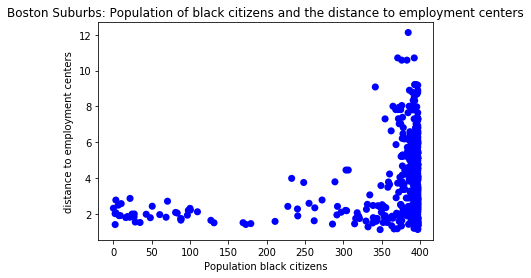

In [9]:
plt.scatter(data[11], data[7], s=50, c="blue", edgecolor="None")
plt.title('Boston Suburbs: Population of black citizens and the distance to employment centers')
plt.xlabel('Population black citizens')
plt.ylabel('distance to employment centers')
plt.show()

**Plotting Data:** The relationship between median value of owner-occuped homes and nitric oxide concentration along with median home value and the proportion of non-retail business (on the same plot).

Similar patterns emerge between the proportion of non retail businesses and NOX conecntration. Indicating more non retail businesses create more polution. It is also apparent that suburbs with higher house prices have less businesses and less polution.

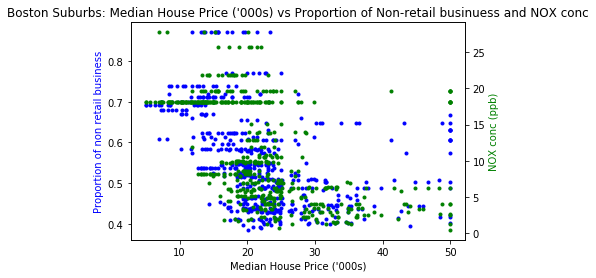

In [10]:
fig, ax1 = plt.subplots()
plt.title("Boston Suburbs: Median House Price ('000s) vs Proportion of Non-retail businuess and NOX conc")
ax2 = ax1.twinx()
ax1.plot(data[13], data[4], 'b.')
ax2.plot(data[13], data[2], 'g.')
ax1.set_xlabel("Median House Price ('000s)")
ax1.set_ylabel('Proportion of non retail business', color='b')
ax2.set_ylabel('NOX conc (ppb)', color='g')
plt.show()

**Question** Are suburbs with older houses more Expensive
**Plotting Data:** Proportion of houses built before 1940 vs Median House Prices

The plotted data shows that suburbs with older houses are cheaper. From my question I was expecting the opposite, I thought older hertitage listed houses would be more expensive. It is likely that for those types of dwellings, simply measuring proportion built before 1940 is not sufficient.  

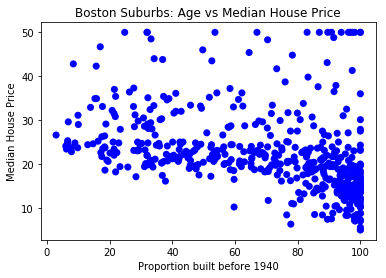

In [11]:
plt.scatter(data[6], data[13], s=50, c="blue", edgecolor="None")
plt.title('Boston Suburbs: Age vs Median House Price')
plt.xlabel('Proportion built before 1940')
plt.ylabel('Median House Price')
plt.show()